## This script tests the data generating function from func.py

In [1]:
import numpy as np
import scipy as sp
import func
import phantom
import KTCFwd
import glob
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import laplace
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as plt
input_folder = 'TrainingData'
Nel = 32
categoryNbr = 1

C:\Users\marti\AppData\Local\Temp\ipykernel_74516\3889937235.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:

Measurement, sigma_class = func.GenerateMeasurement(input_folder)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


## Noise analysis:

In [3]:
# Load data and generate noise free data.
data_number = 1
Path = 'GroundTruths/true' + str(data_number) + '.mat'
Mesh, Mesh2, vincl, Mpat, Injref = func.SetupMesh(categoryNbr, Nel,input_folder)
solver = KTCFwd.EITFEM(Mesh2, Injref, Mpat, vincl)
# Noise free data
Uel_nfree = func.ForwardFromPhanton(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.001,100))
Uelref_nfree = func.ForwardFromPhanton(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.8,0.8))

# True data
mat_dict = sp.io.loadmat(input_folder + '/ref.mat') #load the reference data
Uelref = mat_dict['Uelref']
mat_files = glob.glob(input_folder + '/data*.mat') # load the real data
mat_dict = sp.io.loadmat(mat_files[data_number-1])
Uel = mat_dict['Uel']


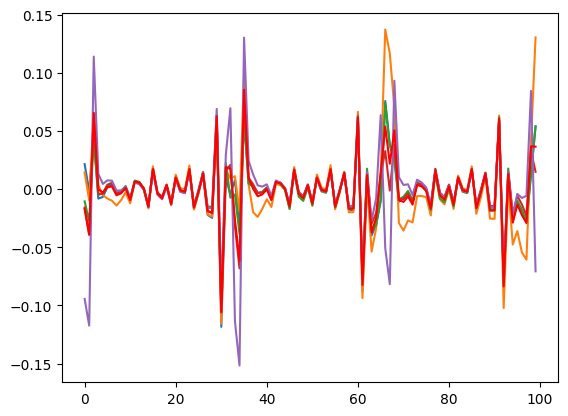

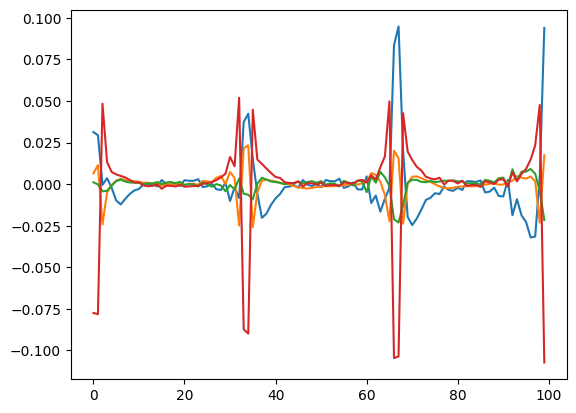

In [4]:
# Consider the noise...: 
#1 Reference noise U_ref - A(s_ref)
GroundTruths_folder = 'GroundTruths'
TrainingData_folder = 'TrainingData'
system_error = func.system_error(GroundTruths_folder, TrainingData_folder,categoryNbr, Nel)
plt.plot(system_error[0:100],color='red')

plt.figure()
for data_number in range(4):
    Path = 'GroundTruths/true' + str(data_number+1) + '.mat'
    Uel_nfree = func.ForwardFromPhanton(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.001,100))

    # True data
    mat_dict = sp.io.loadmat(mat_files[data_number])
    Uel = mat_dict['Uel']
    temp = Uel_nfree + system_error
    error_measurement = Uel - temp
    mult_noise = error_measurement#/(0.025+abs(Uel_nfree))
    plt.plot(mult_noise[0:100])

55.08451097723946


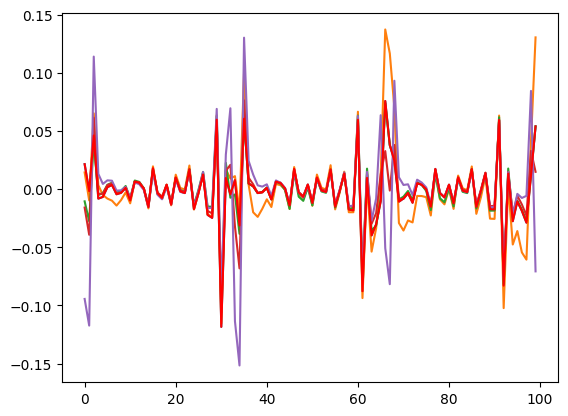

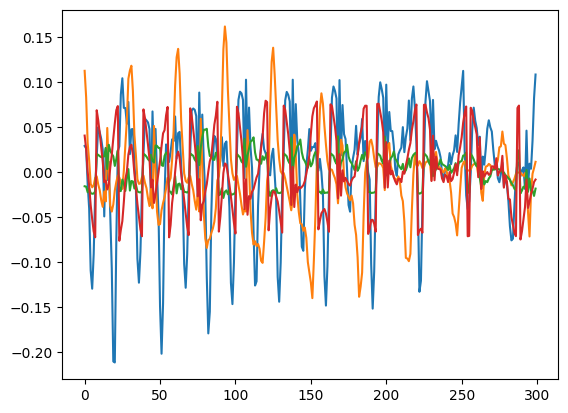

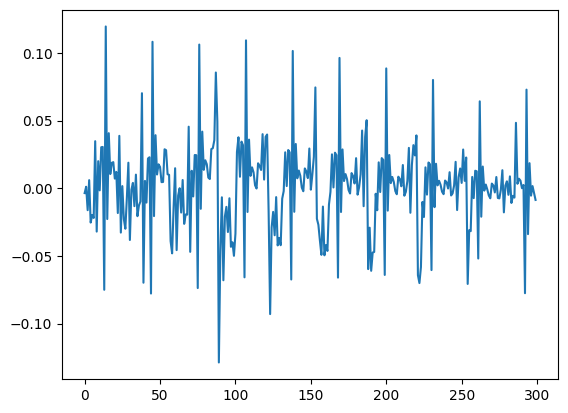

In [37]:
# Consider the noise...: 
#1 Reference noise U_ref - A(s_ref)
GroundTruths_folder = 'GroundTruths'
TrainingData_folder = 'TrainingData'
system_error = func.system_error(GroundTruths_folder, TrainingData_folder,categoryNbr, Nel,False)
Uel_nfree_ref = func.ForwardFromPhanton(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.8,0.8))
plt.plot(system_error[0:100],color='red')
avr_err = np.zeros((4,1))
plt.figure()
for data_number in range(0,4):
    Path = 'GroundTruths/true' + str(data_number+1) + '.mat'
    Uel_nfree = func.ForwardFromPhanton(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.001,100))

    # True data
    mat_dict = sp.io.loadmat(mat_files[data_number])
    Uel = mat_dict['Uel']
    temp = Uel_nfree + system_error
    avr_err[data_number] = np.linalg.norm(temp - Uel_nfree,1)
    error_measurement = Uel - temp
    mult_noise = error_measurement/(0.08 + abs(0*Uel_nfree_ref - Uelref))
    plt.plot(mult_noise[2000:2300])

print(np.mean(avr_err))
plt.figure()
plt.plot((Uel_nfree_ref[2000:2300] - Uelref[2000:2300]))

In [1]:
import numpy as np
import scipy as sp
import func
import phantom
import KTCFwd
import glob
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import laplace
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as plt
input_folder = 'TrainingData'
Nel = 32
categoryNbr = 1

C:\Users\marti\AppData\Local\Temp\ipykernel_64916\3889937235.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
input_folder = 'TrainingData'
groundtruth_folder = 'GroundTruths'
noise_level = 1
categoryNbr = 1
error_system = func.system_error(groundtruth_folder, input_folder,categoryNbr, Nel, average_error = False)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [3]:
Measurement, Measurement_nfree, sigma_class = func.GenerateMeasurement(input_folder,
groundtruth_folder, noise_level, categoryNbr,error_system)

1.7560000000000002


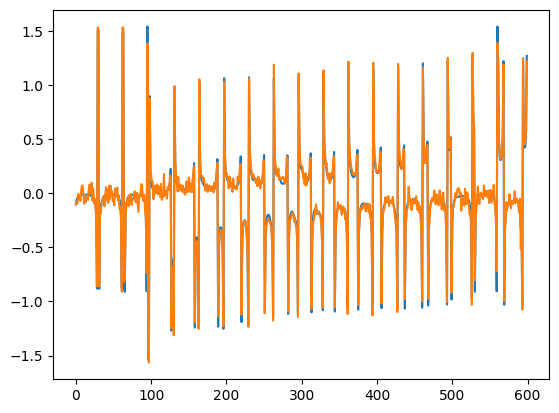

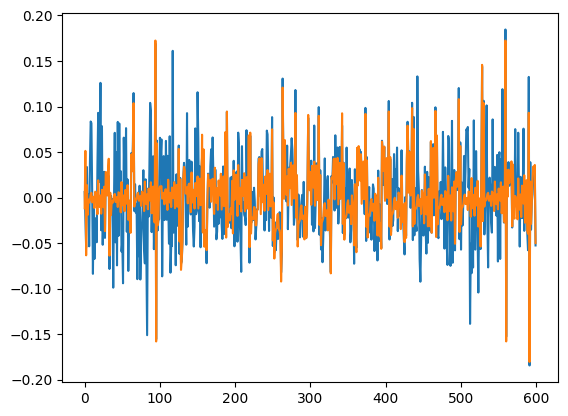

In [4]:
plot_range = range(400,1000)
plt.figure()
plt.plot(Measurement_nfree[plot_range])
plt.plot(Measurement[plot_range])
plt.figure()
error = Measurement - Measurement_nfree  - error_system
print(np.linalg.norm(error))
plt.plot(Measurement[plot_range] - Measurement_nfree[plot_range] )
plt.plot(error_system[plot_range])

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


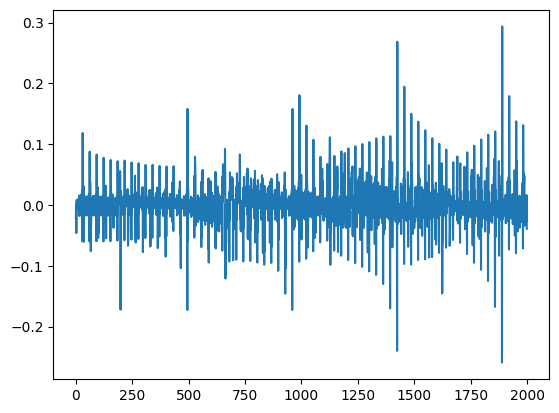

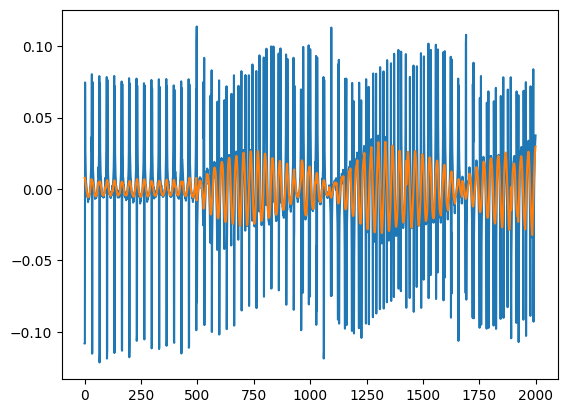

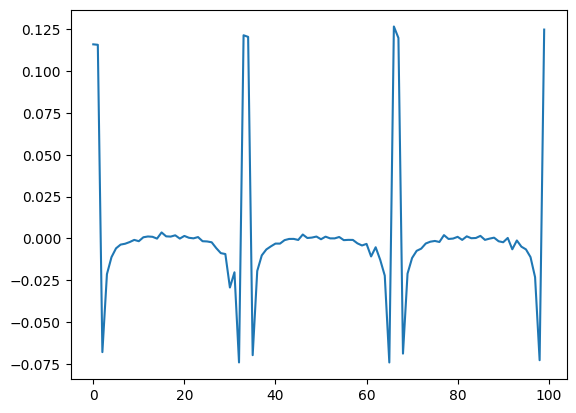

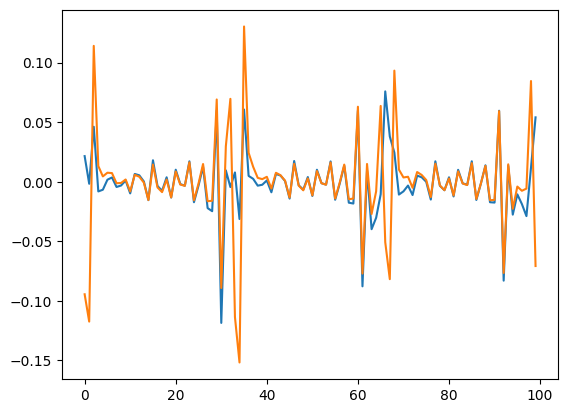

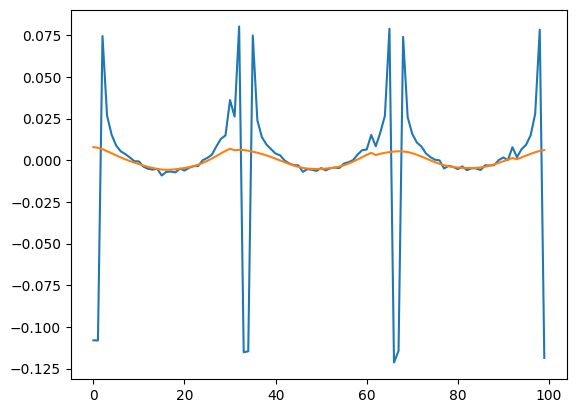

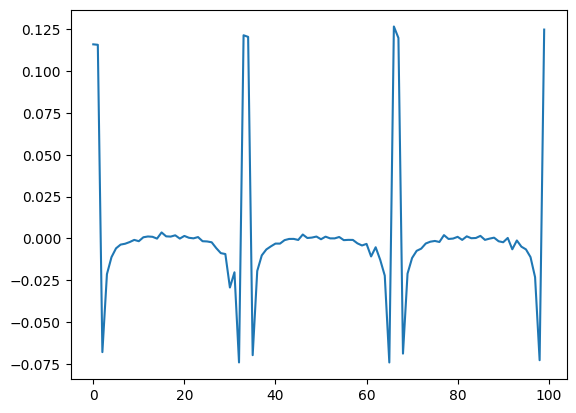

In [99]:
data_number = 4
Path = 'GroundTruths/true' + str(data_number) + '.mat'
z = 1e-6
Uel_nfree_data = func.ForwardFromPhanton_temp(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.001,100),z)
Uel_nfree_ref = func.ForwardFromPhanton_temp(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.8,0.8),z)
Uel_nfree = Uel_nfree_data - Uel_nfree_ref
plot_range = range(0,2000)

plt.figure()
plt.plot(Uel_nfree_ref[plot_range] - Uelref[plot_range])
# True data
mat_dict = sp.io.loadmat(mat_files[data_number-1])
Uel = mat_dict['Uel']
plt.figure()
plt.plot(Uel[plot_range]-Uelref[plot_range])
plt.plot(Uel_nfree[plot_range])
plt.figure()
plt.plot(Uel_nfree[0:100] - (Uel[0:100]-Uelref[0:100]))
plt.figure()
#plt.plot(Uel_nfree[plot_range] - (Uel[plot_range]-Uelref[plot_range]))
plt.plot(Uelref[0:100] - Uel_nfree_ref[0:100])
plt.plot(Uel[0:100] - Uel_nfree_data[0:100])

plt.figure()
plt.plot(Uel[0:100] - Uelref[0:100])
plt.plot(Uel_nfree_data[0:100] - Uel_nfree_ref[0:100])

plt.figure()
plt.plot((Uelref[0:100] - Uel_nfree_ref[0:100]) - (Uel[0:100] - Uel_nfree_data[0:100]))




I suspect that the error in the forward map might be due to a wrong value of the contact impedance. Let do an optimization over this value using the 4'th phantom.

In [51]:
def Forward_error(z, data_number, norm = 2):
    Path = 'GroundTruths/true' + str(data_number) + '.mat'
    Uel_nfree = func.ForwardFromPhanton_temp(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.001,100),z) - func.ForwardFromPhanton_temp(Path, Mesh, Mesh2,Injref, Mpat, vincl,(0.8,0.8,0.8),z)
    mat_dict = sp.io.loadmat(mat_files[data_number-1])
    Uel = mat_dict['Uel']
    mat_dict = sp.io.loadmat('TrainingData' + '/ref.mat') #load the reference data
    Uelref = mat_dict['Uelref']
    true_data = Uel - Uelref
    
    
    diff = np.squeeze(Uel_nfree - true_data)
    return np.linalg.norm(diff, norm)
    


In [55]:
print(Forward_error(1e-6,1,10))

0.1678770916764934


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


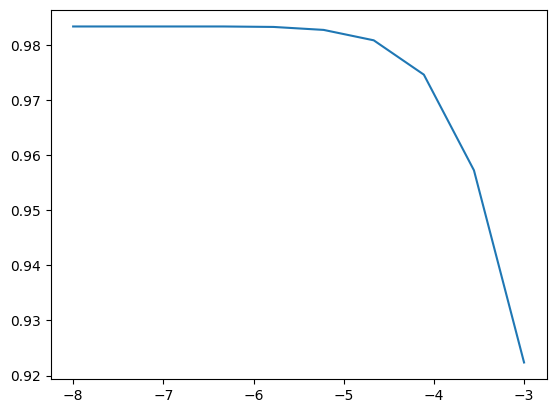

In [52]:
z1 = np.logspace(-8,-3,10)
data = [Forward_error(z,1,2) for z in z1]
plt.plot(np.log10(z1),(data))